# Topic Modelling with LSA

##### Import dependencies

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

##### Import Dataset

In [2]:
NewsData = pd.read_csv(r"C:\Users\Pallavi\Desktop\LDA\abcnews-date-text.csv",parse_dates=[0], infer_datetime_format=True)

In [3]:
NewsData.head()

,publish_date,headline_text
0,2003-02-19,aba decides against community broadcasting lic...
1,2003-02-19,act fire witnesses must be aware of defamation
2,2003-02-19,a g calls for infrastructure protection summit
3,2003-02-19,air nz staff in aust strike for pay rise
4,2003-02-19,air nz strike to affect australian travellers


In [4]:
NewsData['NumWords'] = NewsData['headline_text'].apply(lambda x: len(x.split()))

In [5]:
NewsData.describe()

,NumWords
count,1.244184e+06
mean,6.557523e+00
std,1.868473e+00
min,1.000000e+00
25%,5.000000e+00
50%,7.000000e+00
75%,8.000000e+00
max,1.500000e+01


Text(0.5, 1.0, 'Distributon of number of words in the headlines')

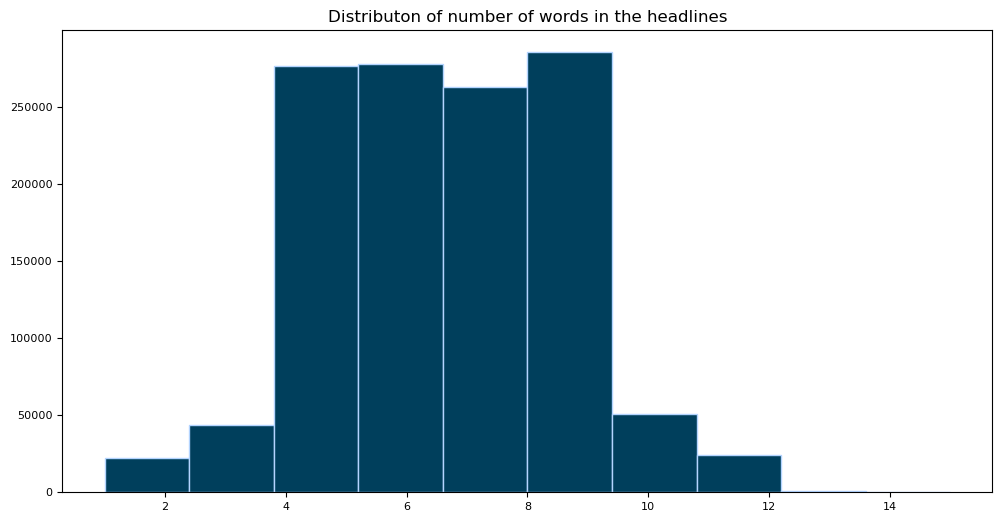

In [53]:
NewsData[['NumWords']].hist(figsize=(12, 6), bins=10, xlabelsize=8, ylabelsize=8,color= "#003f5c", ec="#b3d4ff");
plt.grid(False)
plt.title("Distributon of number of words in the headlines")

In [7]:
NewsData['year'] = pd.DatetimeIndex(NewsData['publish_date']).year
NewsData['month'] = pd.DatetimeIndex(NewsData['publish_date']).month
NewsData['day'] = pd.DatetimeIndex(NewsData['publish_date']).day

In [8]:
NewsData.head()

,publish_date,headline_text,NumWords,year,month,day
0,2003-02-19,aba decides against community broadcasting lic...,6,2003,2,19
1,2003-02-19,act fire witnesses must be aware of defamation,8,2003,2,19
2,2003-02-19,a g calls for infrastructure protection summit,7,2003,2,19
3,2003-02-19,air nz staff in aust strike for pay rise,9,2003,2,19
4,2003-02-19,air nz strike to affect australian travellers,7,2003,2,19


Text(0.5, 1.0, 'Distributon of number of headlines across days')

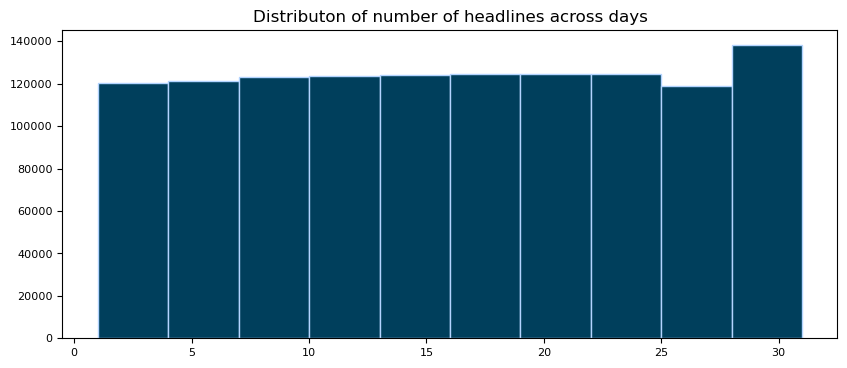

In [9]:
NewsData['day'].hist(figsize=(10, 4), bins=10, xlabelsize=8, ylabelsize=8,  color="#003f5c", ec="#b3d4ff");
plt.grid(False)
plt.title("Distributon of number of headlines across days")

Text(0.5, 1.0, 'Distributon of number of headlines across months')

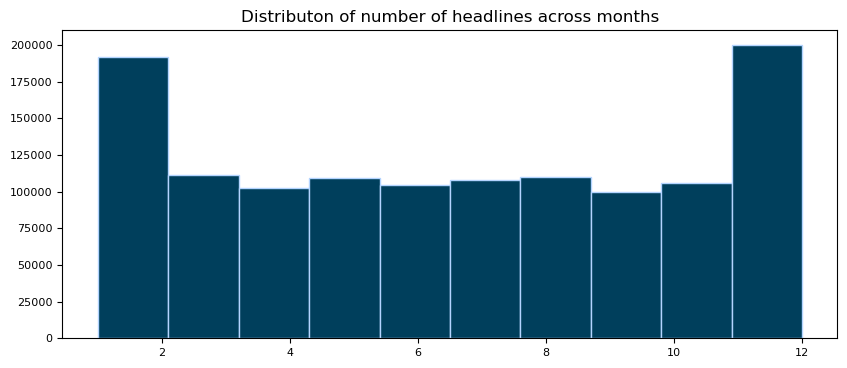

In [10]:
NewsData['month'].hist(figsize=(10, 4), bins=10, xlabelsize=8, ylabelsize=8, color="#003f5c", ec="#b3d4ff");
plt.grid(False)
plt.title("Distributon of number of headlines across months")

Text(0.5, 1.0, 'Distributon of number of headlines across years')

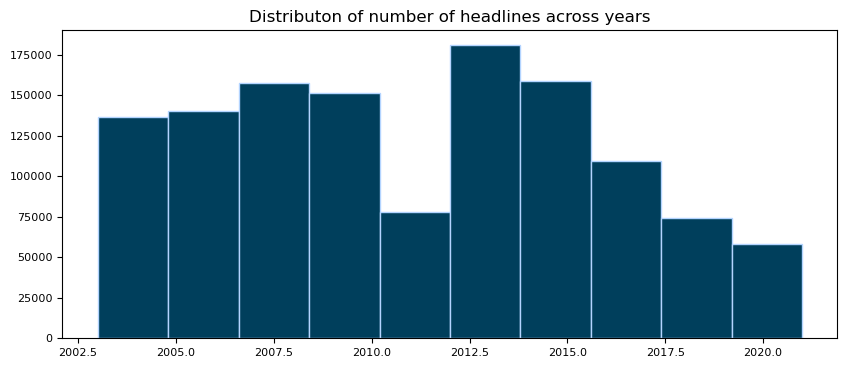

In [55]:
NewsData['year'].hist(figsize=(10, 4), bins=10, xlabelsize=8, ylabelsize=8, color="#003f5c", ec="#b3d4ff");
plt.grid(False)
plt.title("Distributon of number of headlines across years")

In [12]:
NewsData.index = NewsData['publish_date']

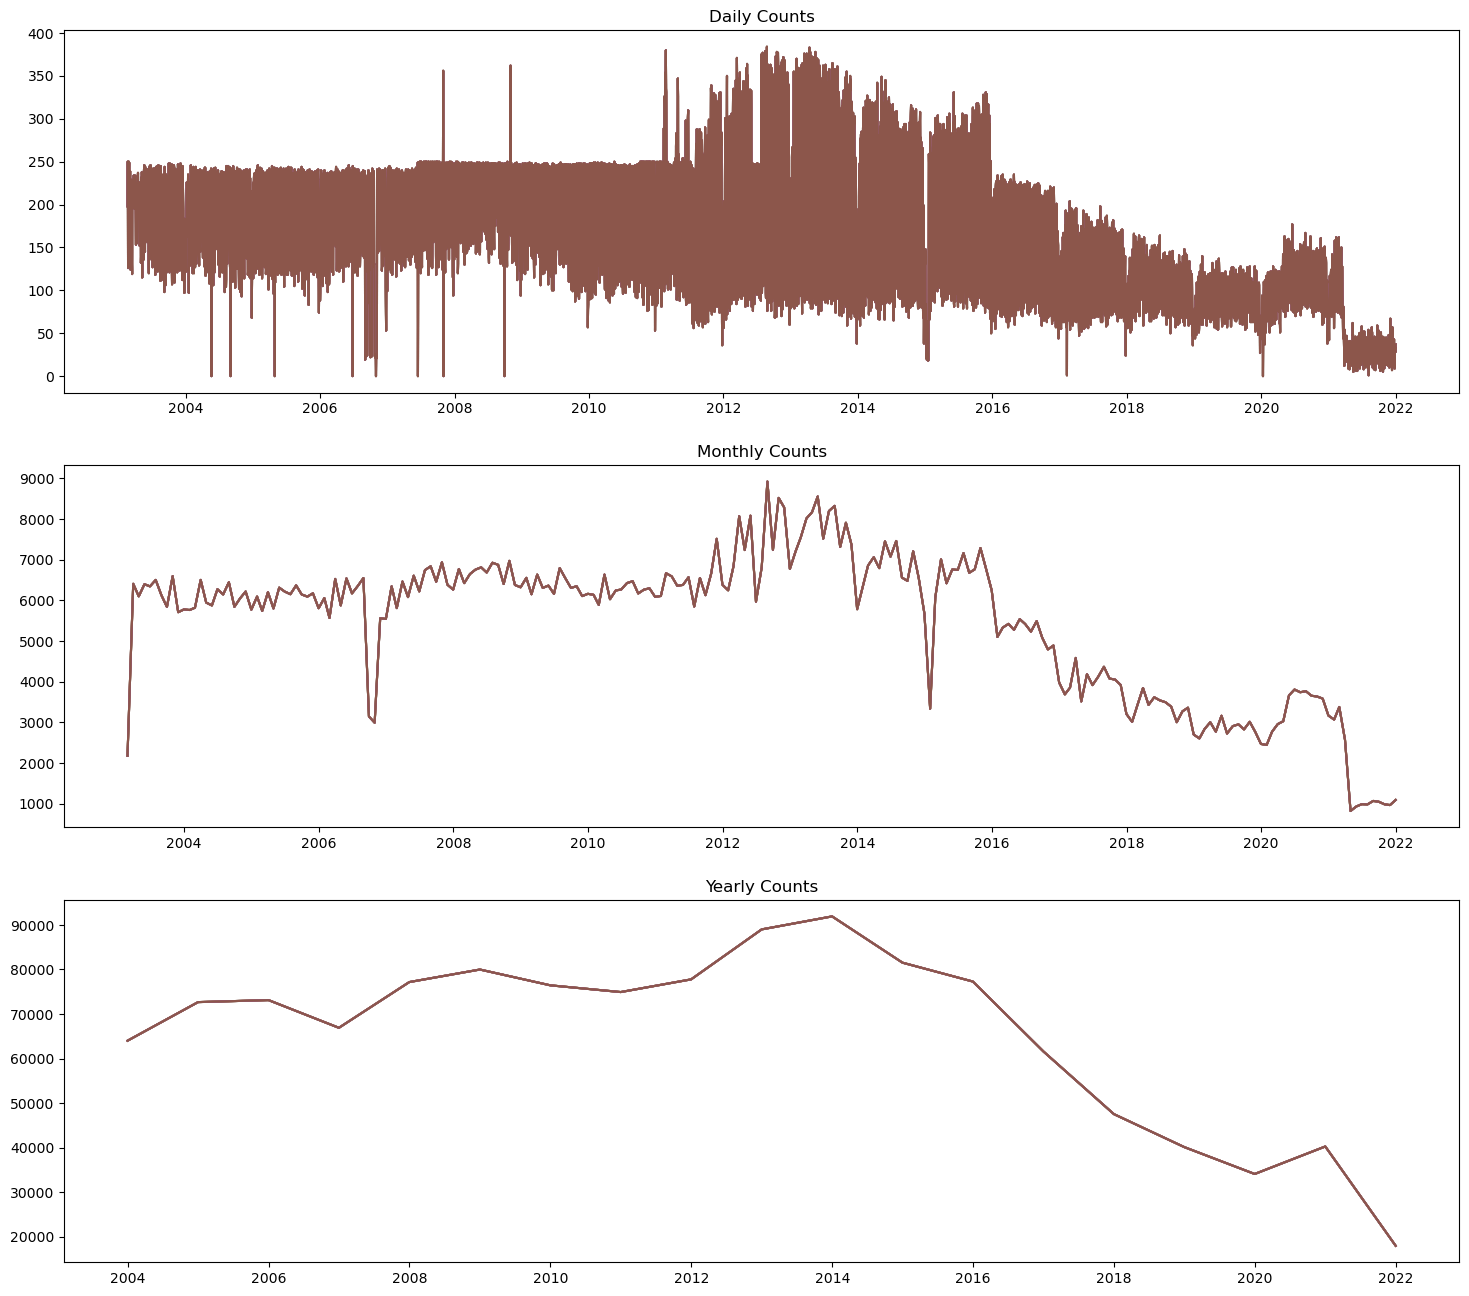

In [13]:
monthly_counts = NewsData.resample('M').count()
yearly_counts =NewsData .resample('A').count()
daily_counts = NewsData.resample('D').count()

fig, ax = plt.subplots(3, figsize=(18,16) )
ax[0].plot(daily_counts);
ax[0].set_title('Daily Counts');

ax[1].plot(monthly_counts);
ax[1].set_title('Monthly Counts');

ax[2].plot(yearly_counts);
ax[2].set_title('Yearly Counts');

plt.show()

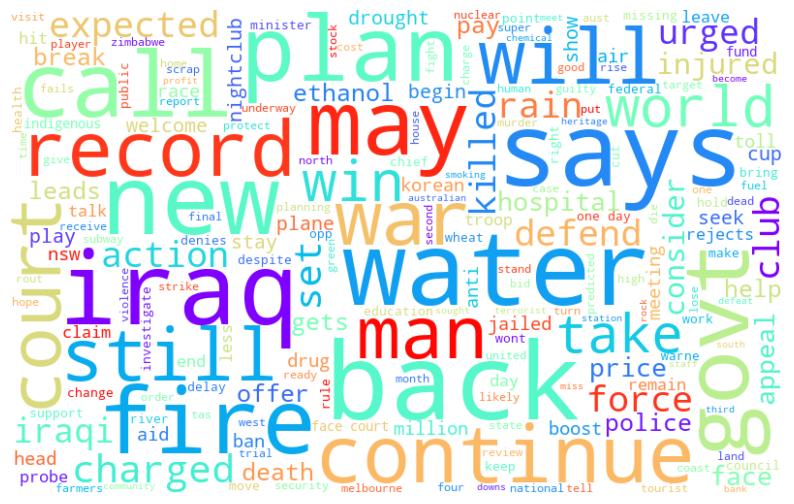

In [69]:
from wordcloud import WordCloud
all_words = ''.join([word for word in NewsData['headline_text'][0:1000]])
all_words
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,contour_color='#023075',contour_width=3,colormap='rainbow',background_color='white').generate(all_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [19]:
import re
NON_ALPHANUM = re.compile(r'[\W]')
NON_ASCII = re.compile(r'[^a-z0-1\s]')
def normalize_texts(texts):
  normalized_texts = ''
  lower = texts.lower()
  no_punctuation = NON_ALPHANUM.sub(r' ', lower)
  no_non_ascii = NON_ASCII.sub(r'', no_punctuation)
  return no_non_ascii
  
NewsData['headline_text'] = NewsData['headline_text'].apply(normalize_texts)
NewsData.head()

,publish_date,headline_text,NumWords,year,month,day
publish_date,,,,,,
2003-02-19,2003-02-19,aba decides against community broadcasting lic...,6,2003,2,19
2003-02-19,2003-02-19,act fire witnesses must aware defamation,8,2003,2,19
2003-02-19,2003-02-19,calls for infrastructure protection summit,7,2003,2,19
2003-02-19,2003-02-19,air staff aust strike for pay rise,9,2003,2,19
2003-02-19,2003-02-19,air strike affect australian travellers,7,2003,2,19


In [20]:
NewsData['headline_text'] = NewsData['headline_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

In [21]:
def get_top_n_words(corpus, n=10):
  vec = CountVectorizer(stop_words='english').fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0) 
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
  return words_freq[:n]

In [22]:
get_top_n_words(NewsData['headline_text'],15)

[('police', 39852),
 ('new', 33742),
 ('man', 30762),
 ('says', 23732),
 ('court', 18187),
 ('australia', 17416),
 ('govt', 17104),
 ('council', 16988),
 ('nsw', 16545),
 ('interview', 15595),
 ('australian', 13649),
 ('sydney', 13250),
 ('plan', 13002),
 ('water', 12862),
 ('death', 12783)]

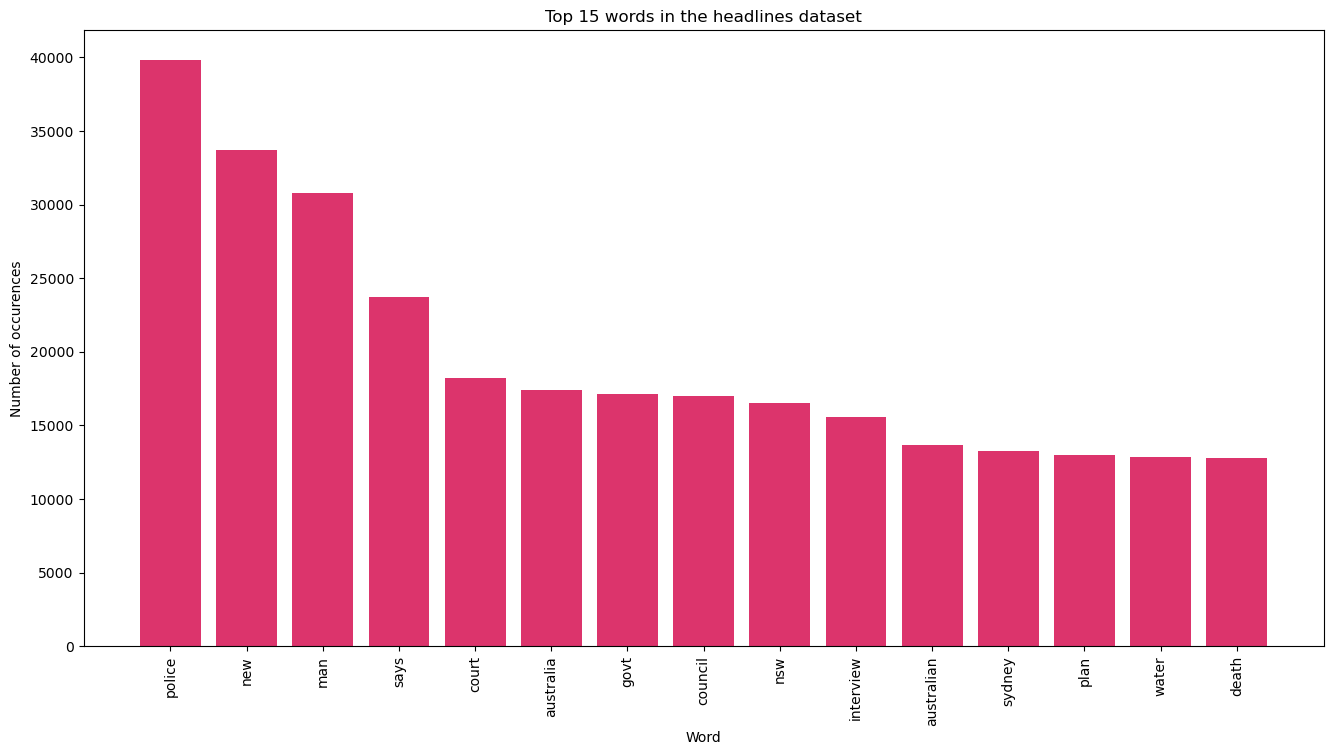

In [23]:
words = []
word_values = []
for i,j in get_top_n_words(NewsData['headline_text'],15):
  words.append(i)
  word_values.append(j)
fig, ax = plt.subplots(figsize=(16,8))

ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top 15 words in the headlines dataset');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
ax.bar(words, word_values, color='#dc346c')
plt.show()

### Method 1 : Clustering using LDA ( Latent Dirichlet Analysis)

In [24]:
news = NewsData.sample(frac = 0.02, random_state= 423)

In [25]:
news.head()

,publish_date,headline_text,NumWords,year,month,day
publish_date,,,,,,
2011-10-25,2011-10-25,baby plucked from turkey quake rubble,6,2011,10,25
2004-12-02,2004-12-02,arson may behind house fire,6,2004,12,2
2014-09-10,2014-09-10,west indies beat bangladesh wickets,7,2014,9,10
2006-07-16,2006-07-16,howard hints may stay leader,8,2006,7,16
2010-06-30,2010-06-30,taser trial starts this weekend,5,2010,6,30


In [26]:
news = news.drop(columns = 'publish_date')
news = news.reset_index()
news.head()

,publish_date,headline_text,NumWords,year,month,day
0,2011-10-25,baby plucked from turkey quake rubble,6,2011,10,25
1,2004-12-02,arson may behind house fire,6,2004,12,2
2,2014-09-10,west indies beat bangladesh wickets,7,2014,9,10
3,2006-07-16,howard hints may stay leader,8,2006,7,16
4,2010-06-30,taser trial starts this weekend,5,2010,6,30


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vectorizer = TfidfVectorizer(stop_words='english', max_features=50000)
news_matrix = tf_vectorizer.fit_transform(news['headline_text'])

In [28]:
news_matrix.shape

(24884, 19586)

In [29]:
#importing LDA

from gensim import corpora, models
from sklearn.decomposition import LatentDirichletAllocation

In [30]:
#Fitting LDA

lda = LatentDirichletAllocation(n_components=8, learning_method='online', 
                                          random_state=0, verbose=0, n_jobs = -1)
lda_model = lda.fit(news_matrix)

In [31]:
lda_matrix = lda_model.transform(news_matrix)

In [32]:
lda_matrix

array([[0.03886659, 0.03886659, 0.03886659, ..., 0.20198059, 0.15340628,
        0.03886659],
       [0.05197684, 0.05197684, 0.05197684, ..., 0.05197684, 0.63616211,
        0.05197684],
       [0.0389123 , 0.0389123 , 0.0389123 , ..., 0.0389123 , 0.03891896,
        0.0389123 ],
       ...,
       [0.03456518, 0.26283748, 0.03456518, ..., 0.03456518, 0.258064  ,
        0.0345735 ],
       [0.21749531, 0.22885129, 0.03915994, ..., 0.03915994, 0.03915994,
        0.03915994],
       [0.1746171 , 0.03876271, 0.1869323 , ..., 0.03876271, 0.16859793,
        0.19673156]])

In [33]:
def print_topics(model, count_vectorizer, n_top_words):
    words = tf_vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(model.components_):
      
        print("\nTopic #%d:" % topic_idx )
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

In [34]:
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda_model, news_matrix, 15)

Topics found via LDA:

Topic #0:
interview win attack school market high country fears iraq guilty workers rise claims union action

Topic #1:
murder car australian china qld queensland charges open changes business state pay drought big jail

Topic #2:
charged abc woman government rural sex hit calls arrested assault deal drug man injured housing

Topic #3:
court death home funding national talks police jailed cut set gets tasmania man years review

Topic #4:
police council crash man missing accused dead south dies govt boost farmers nsw canberra indigenous

Topic #5:
health melbourne cup world public coast face gold group record ban final urged police brisbane

Topic #6:
news child hospital adelaide house change election centre community coronavirus north test trump report weather

Topic #7:
sydney water industry plans takes future mining concerns warns bid port lead victory bank meeting


In [35]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=1000, verbose=1, random_state=0, angle=0.75)

tsne_features = model.fit_transform(lda_matrix)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 24884 samples in 0.051s...
[t-SNE] Computed neighbors for 24884 samples in 9.931s...
[t-SNE] Computed conditional probabilities for sample 1000 / 24884
[t-SNE] Computed conditional probabilities for sample 2000 / 24884
[t-SNE] Computed conditional probabilities for sample 3000 / 24884
[t-SNE] Computed conditional probabilities for sample 4000 / 24884
[t-SNE] Computed conditional probabilities for sample 5000 / 24884
[t-SNE] Computed conditional probabilities for sample 6000 / 24884
[t-SNE] Computed conditional probabilities for sample 7000 / 24884
[t-SNE] Computed conditional probabilities for sample 8000 / 24884
[t-SNE] Computed conditional probabilities for sample 9000 / 24884
[t-SNE] Computed conditional probabilities for sample 10000 / 24884
[t-SNE] Computed conditional probabilities for sample 11000 / 24884
[t-SNE] Computed conditional probabilities for sample 12000 / 24884
[t-SNE] Computed conditional probabilities for sa

In [36]:
tsne_features

array([[ 22.226883 , -14.613124 ],
       [ 19.536823 ,  53.751045 ],
       [ 64.71252  ,   1.6783   ],
       ...,
       [ 25.919748 ,  28.460974 ],
       [  1.087052 ,  -3.8558333],
       [-10.003649 ,  -1.9385462]], dtype=float32)

In [37]:
tsne_features.shape

(24884, 2)

In [38]:
#get 25 gb ram

#a = []
#while(1):
#  a.append(1)

In [39]:
df = pd.DataFrame(tsne_features)
df['topic'] = lda_matrix.argmax(axis=1)
df.columns = ['TSNE1', 'TSNE2', 'topic']


In [40]:
df.head()

,TSNE1,TSNE2,topic
0,22.226883,-14.613124,3
1,19.536823,53.751045,6
2,64.712517,1.678300,4
3,16.569490,61.841320,6
4,-41.162506,-47.293514,0


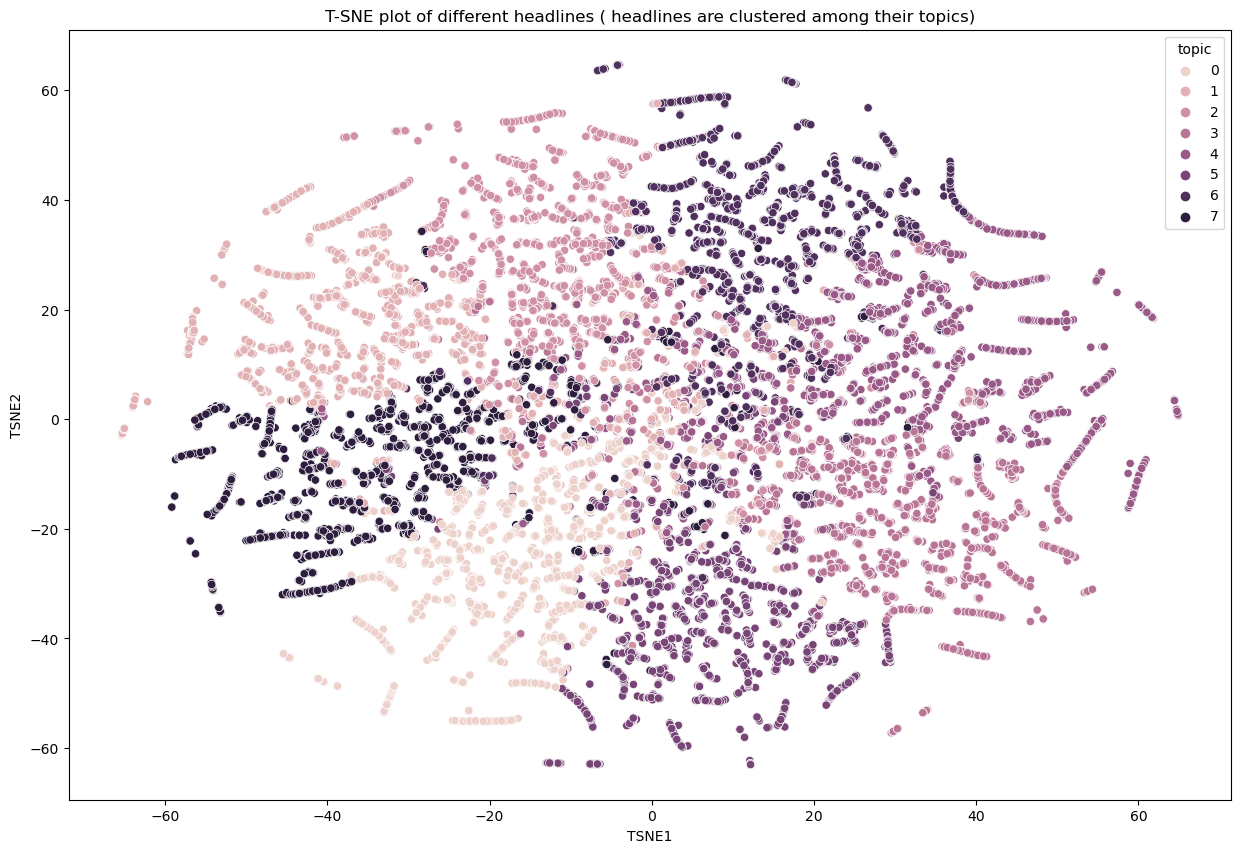

In [41]:
import seaborn as sns
plt.figure(figsize=(15, 10))
plt.title('T-SNE plot of different headlines ( headlines are clustered among their topics)')
ax = sns.scatterplot(x = 'TSNE1', y = 'TSNE2', hue = 'topic', data = df, legend = 'full')
plt.show()